In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
plt.rc('font', family='Malgun Gothic') # 폰트 지정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [16]:
import warnings
warnings.filterwarnings('ignore')

-----------------------

# 1. 데이터 불러오기

In [17]:
df = pd.read_csv('./dataset/final_data/ks200.csv', index_col="날짜")
df.head()

,레이블,WTI,환율,VIX,PER,PBR,통화량,기준금리,소비자물가지수,수입금액지수,...,한국경제성장률,미국경제성장률,OBV,ADI,EOM,MFI,MACD,ADX,RSI,ATR
날짜,,,,,,,,,,,,,,,,,,,,,
2011-04-01,down,107.94,1099.2,17.40,18.73,1.66,1686110.4,3.0,89.325,123.11,...,0.5,0.7,1444800.0,337547.49,766.40,72.47,27.20,28.33,80.28,28.80
2011-04-04,down,108.47,1085.2,17.50,18.68,1.65,1686110.4,3.0,89.325,123.11,...,0.5,0.7,1143000.0,33226.37,233.79,67.16,30.05,28.20,96.77,28.29
2011-04-05,down,108.34,1086.5,17.25,18.82,1.66,1686110.4,3.0,89.325,123.11,...,0.5,0.7,1470700.0,327700.00,306.19,69.76,33.10,28.22,96.44,27.89
2011-04-06,down,108.83,1087.2,16.90,18.78,1.66,1686110.4,3.0,89.325,123.11,...,0.5,0.7,1047700.0,-64353.23,348.72,62.83,34.82,28.39,94.51,27.09
2011-04-07,neutral,110.30,1083.3,17.11,18.74,1.66,1686110.4,3.0,89.325,123.11,...,0.5,0.7,664900.0,-47319.74,-274.25,57.29,35.41,28.13,91.27,26.88


------------------------

# 2. 데이터 전처리

## EDA

- 데이터 정보 확인

In [18]:
# df.info()

## 결측치 제거

- 결측치 제거(공휴일)
- PER 결측치 0으로 대체

In [19]:
# 코드 생략

- 결측치 제거 확인

In [20]:
# df.info()

## 기초통계량 확인

- 상대적으로 값이 큰(평균이 1000이 넘는) 피쳐는 로그 변환 실시가 필요함

In [21]:
# df.describe()

##  로그 변환

In [22]:
# # 통화량, 환율 로그 변환
# feature_to_log_transform = ['통화량', '환율']
# df[feature_to_log_transform] = np.log(df[feature_to_log_transform])

In [23]:
# df.describe()

## 정규성 확인 (for scaling method selection)
- 환율, PBR, 수입금액지수, 수출금액지수, 경제심리지수, 경지종합지수, 실업률, 고용률 : 정규성 o -> 최소 최대 스케일링 적용
- WTI, VIX, PER, 통화량, 기준금리, 소비자물가지수, 한국경제성장률, 미국경제성장률 : 정규성 x -> 표준화 스케일링 적용

In [24]:
# df.hist(figsize=(15,15))

## Test-Train-Split

In [25]:
encoder = LabelEncoder()
df['레이블']= encoder.fit_transform(df['레이블'])
df['레이블'].value_counts()

레이블
0    1357
2     847
1     719
Name: count, dtype: int64

In [26]:
X = df.drop('레이블',axis=1)
y = df[['레이블']]

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) 

In [28]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
print(y_train.value_counts())
print(y_test.value_counts())

2046
877
2046
877
레이블
0      950
2      593
1      503
Name: count, dtype: int64
레이블
0      407
2      254
1      216
Name: count, dtype: int64


In [29]:
# train_data = pd.concat([X_train,y_train], axis=1)
# test_data= pd.concat([X_test,y_test],axis=1 )

## 이상치

- Box Plot
    - train_data의 이상치 확인 (test_data는 과적합 방지 차원에서 건들지 않음)
    - 추가로 스케일링이 필요함을 확인할 수 있음

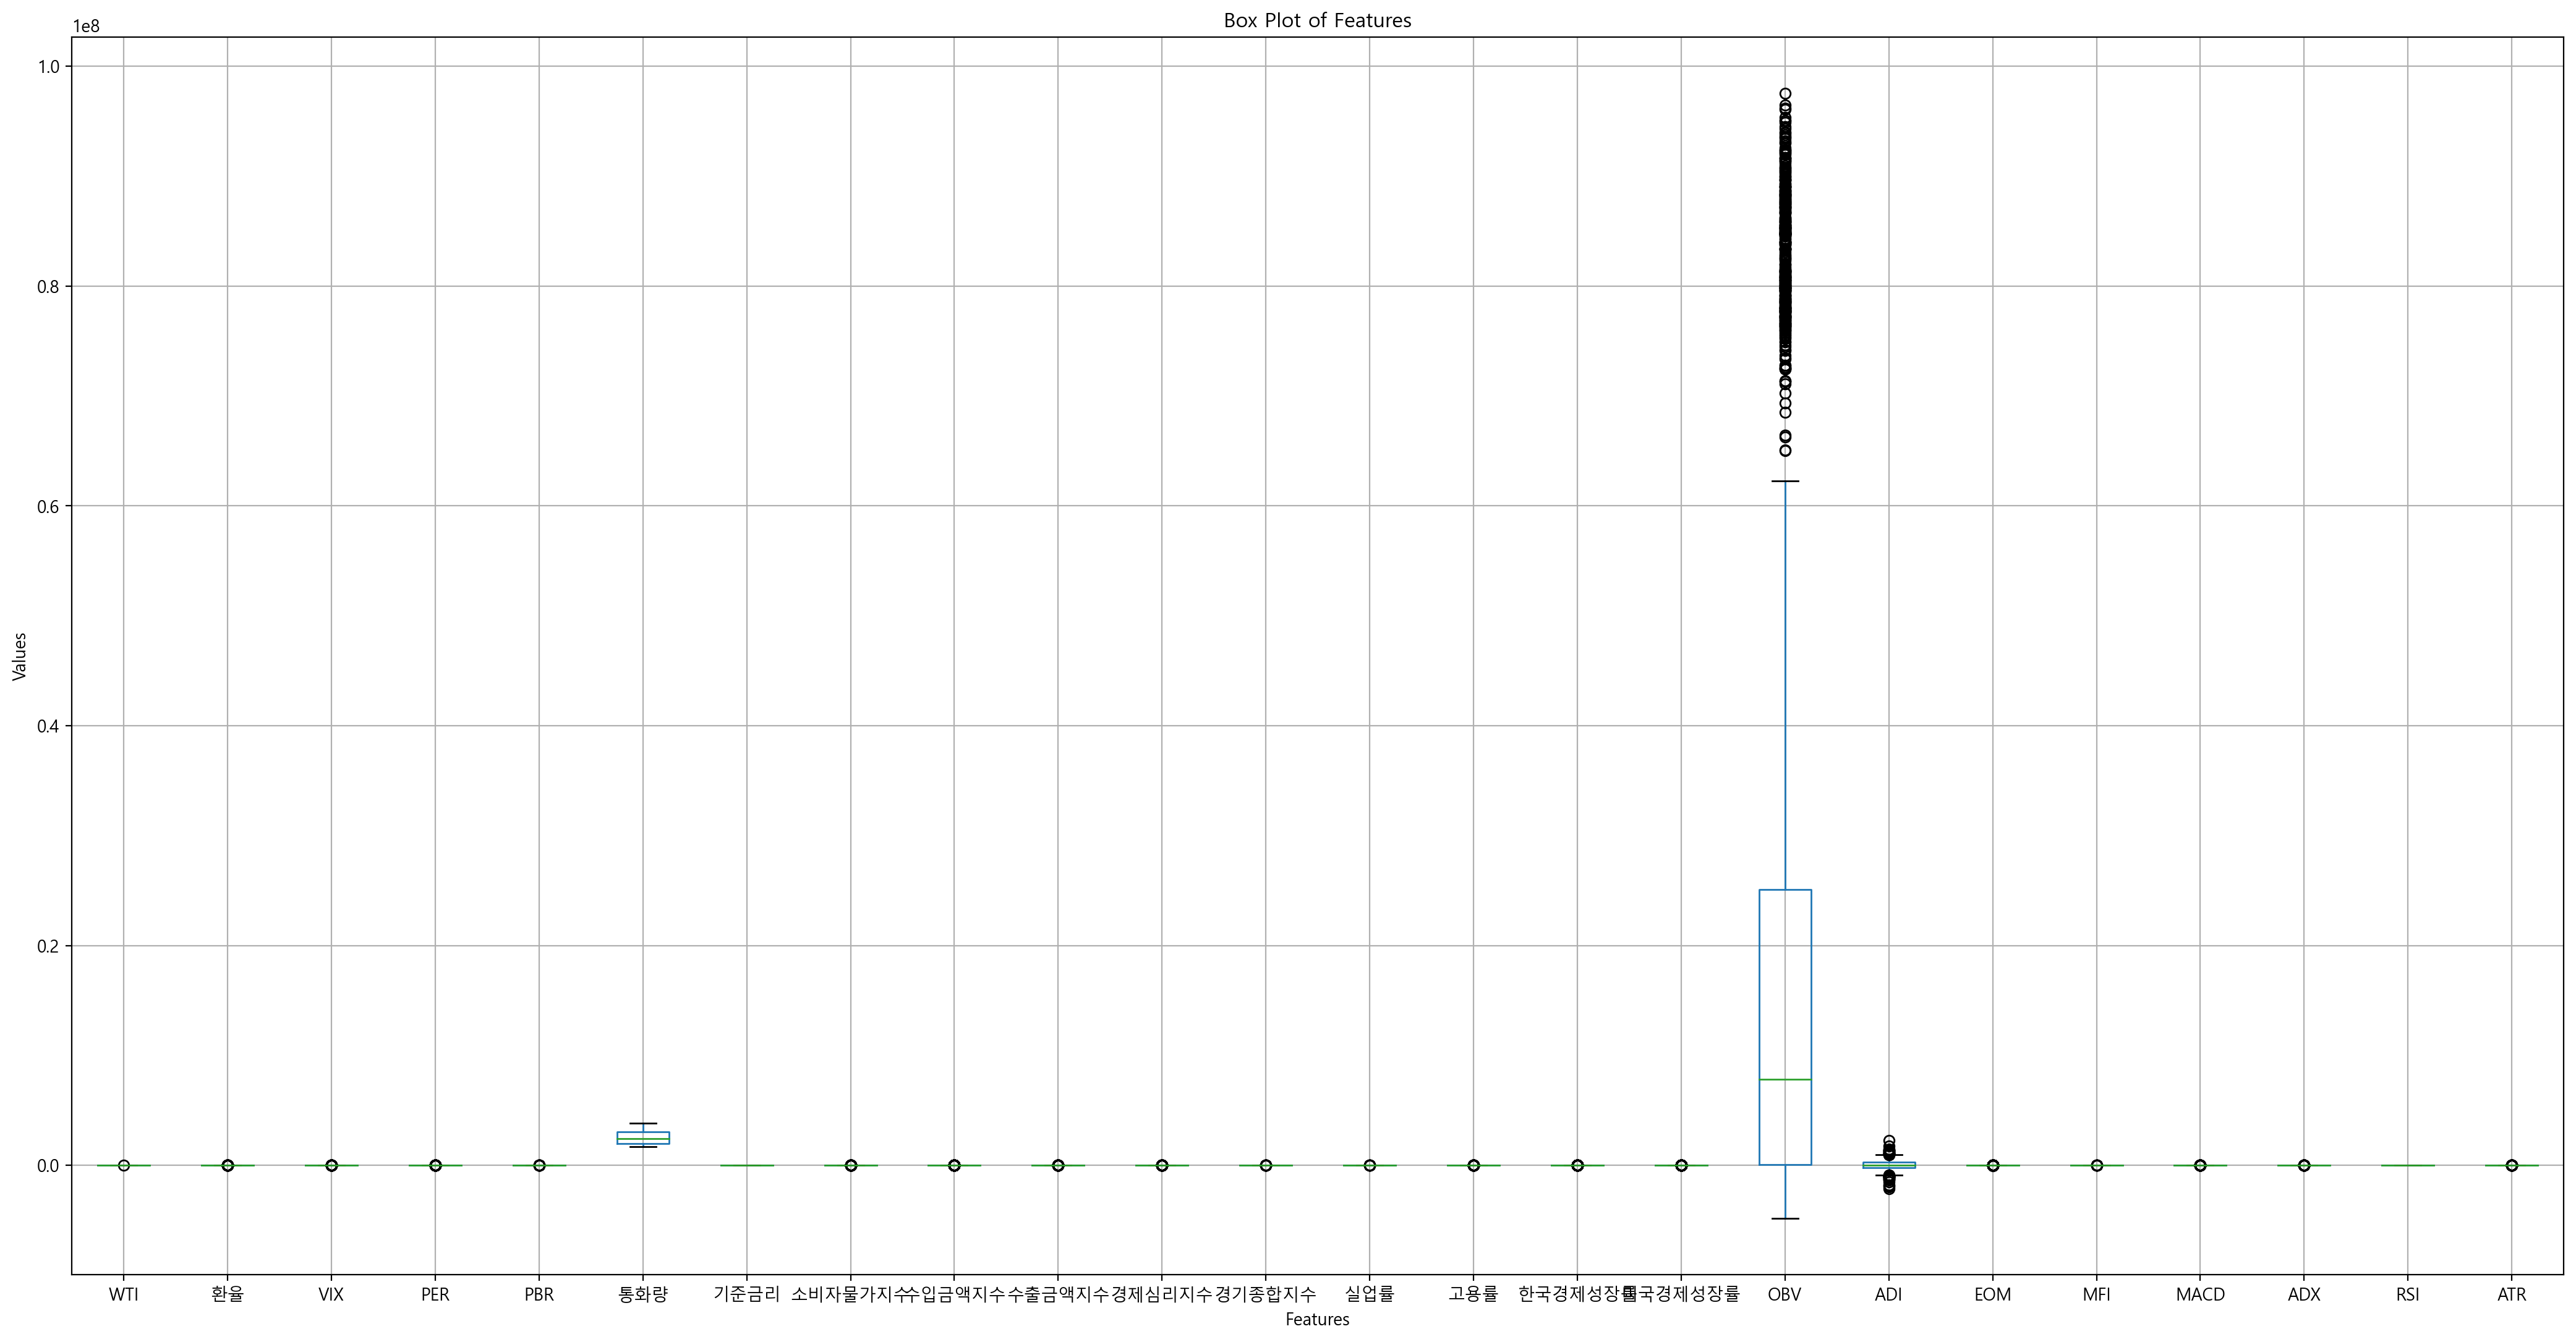

In [30]:
# plt.figure(figsize=(26, 13))
# X_train.boxplot()
# plt.title('Box Plot of Features')
# plt.ylabel('Values')
# plt.xlabel('Features')
# plt.show()

이상치는 존재하지만, 후보 피처 모두 실제 경제 상황을 나타내는 피처들이기 때문에 제거하지 않음. (맞는 논리?)

--------------------

# 3. 스케일링
- 분류 모델에서 스케일링이 필수적인 단계는 아니지만 성능을 조금이라도 높일 가능성과, 컴퓨팅 리소스 낭비 방지 차원에서 실시

In [31]:
# X_train = train_data.drop('레이블', axis=1)
# y_train = train_data[['레이블']]

# X_test = test_data.drop('레이블', axis=1)
# y_test = test_data[['레이블']]

- 스케일링
    - 환율, PBR, 수입금액지수, 수출금액지수, 경제심리지수, 경기종합지수, 실업률, 고용률 : 정규성 o 
    -> 표준화 스케일링 적용
    - WTI, VIX, PER, 통화량, 기준금리, 소비자물가지수, 한국경제성장률, 미국경제성장률 : 정규성 x 
    -> 최소 최대 스케일링 적용

In [32]:
# # 표준화 (StandardScaler)
# features_to_standardize = ['WTI', 'VIX', 'PER', '통화량', '기준금리', '소비자물가지수', '한국경제성장률', '미국경제성장률']
# scaler_standardize = StandardScaler()
# X_train[features_to_standardize] = scaler_standardize.fit_transform(X_train[features_to_standardize])
# X_test[features_to_standardize] = scaler_standardize.transform(X_test[features_to_standardize])

In [33]:
df.columns

Index(['레이블', 'WTI', '환율', 'VIX', 'PER', 'PBR', '통화량', '기준금리', '소비자물가지수',
       '수입금액지수', '수출금액지수', '경제심리지수', '경기종합지수', '실업률', '고용률', '한국경제성장률',
       '미국경제성장률', 'OBV', 'ADI', 'EOM', 'MFI', 'MACD', 'ADX', 'RSI', 'ATR'],
      dtype='object')

In [34]:
# 최소-최대 스케일링 (Min-Max Scaling)
features_to_minmax = ['환율', 'PBR', '수입금액지수', '수출금액지수', '경제심리지수', '경기종합지수', '실업률', '고용률','WTI', 'VIX', 'PER', '통화량', '기준금리', '소비자물가지수', '한국경제성장률', '미국경제성장률', 'OBV', 'ADI', 'EOM', 'MFI', 'MACD', 'ADX', 'RSI', 'ATR']
scaler_standard = StandardScaler()
X_train[features_to_minmax] = scaler_standard.fit_transform(X_train[features_to_minmax])
X_test[features_to_minmax] = scaler_standard.transform(X_test[features_to_minmax])

In [35]:
X_train

,WTI,환율,VIX,PER,PBR,통화량,기준금리,소비자물가지수,수입금액지수,수출금액지수,...,한국경제성장률,미국경제성장률,OBV,ADI,EOM,MFI,MACD,ADX,RSI,ATR
날짜,,,,,,,,,,,,,,,,,,,,,
2014-02-14,1.281694,-1.074466,-0.652580,-0.260033,0.394706,-0.916248,0.689197,-0.714150,-0.228237,-0.772673,...,0.368343,-0.514018,-0.710221,0.065400,0.260134,1.255457,-0.387424,0.045881,-0.247599,-0.732374
2011-11-02,0.943956,-0.287356,1.938749,-0.604270,1.083545,-1.228262,1.539507,-1.361334,-0.181336,-0.420530,...,-0.148905,0.361167,-0.655135,0.907681,-1.649772,1.271737,1.124013,-1.019071,0.557577,1.487141
2021-03-25,-0.527958,-0.142065,0.190920,3.670609,1.208789,1.132938,-1.578296,0.762014,0.777775,1.146839,...,1.532150,0.594550,1.535611,0.226328,0.487738,-0.992207,-0.433272,-0.205518,-0.303328,2.239011
2021-06-10,-0.019400,-0.385610,-0.310584,0.780000,1.334032,1.278004,-1.578296,0.801454,0.789500,1.421790,...,0.368343,0.711241,1.959864,0.661284,0.013188,0.205394,0.764165,-0.786295,0.900662,0.555666
2013-03-12,0.945256,-0.701128,-0.828310,-0.303978,1.146167,-1.056362,0.972634,-0.907216,-0.045794,-0.141903,...,0.368343,0.244476,-0.782804,-0.717193,0.198215,-0.235185,0.292202,-0.422000,0.008409,-0.757026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-20,-0.102209,-1.061797,-0.205147,-0.340599,0.269463,0.043689,-0.444550,0.215683,-0.019999,0.536653,...,0.109719,0.127784,-0.223381,-0.597984,0.011599,0.293917,0.176234,-1.405480,0.433927,-0.226138
2021-03-09,-0.291671,-0.064567,0.761364,3.624222,1.146167,1.132938,-1.578296,0.762014,0.777775,1.146839,...,1.532150,0.594550,1.562057,1.226597,-1.559334,-1.109220,-0.492219,-0.178749,-1.076575,3.611571
2021-10-06,0.290157,0.568086,0.351779,-0.123315,0.332085,1.489680,-1.294860,1.045603,1.316659,1.682038,...,1.014902,0.711241,2.035816,-2.457102,-0.964373,-1.311703,-1.962432,1.073588,-2.065194,1.453685


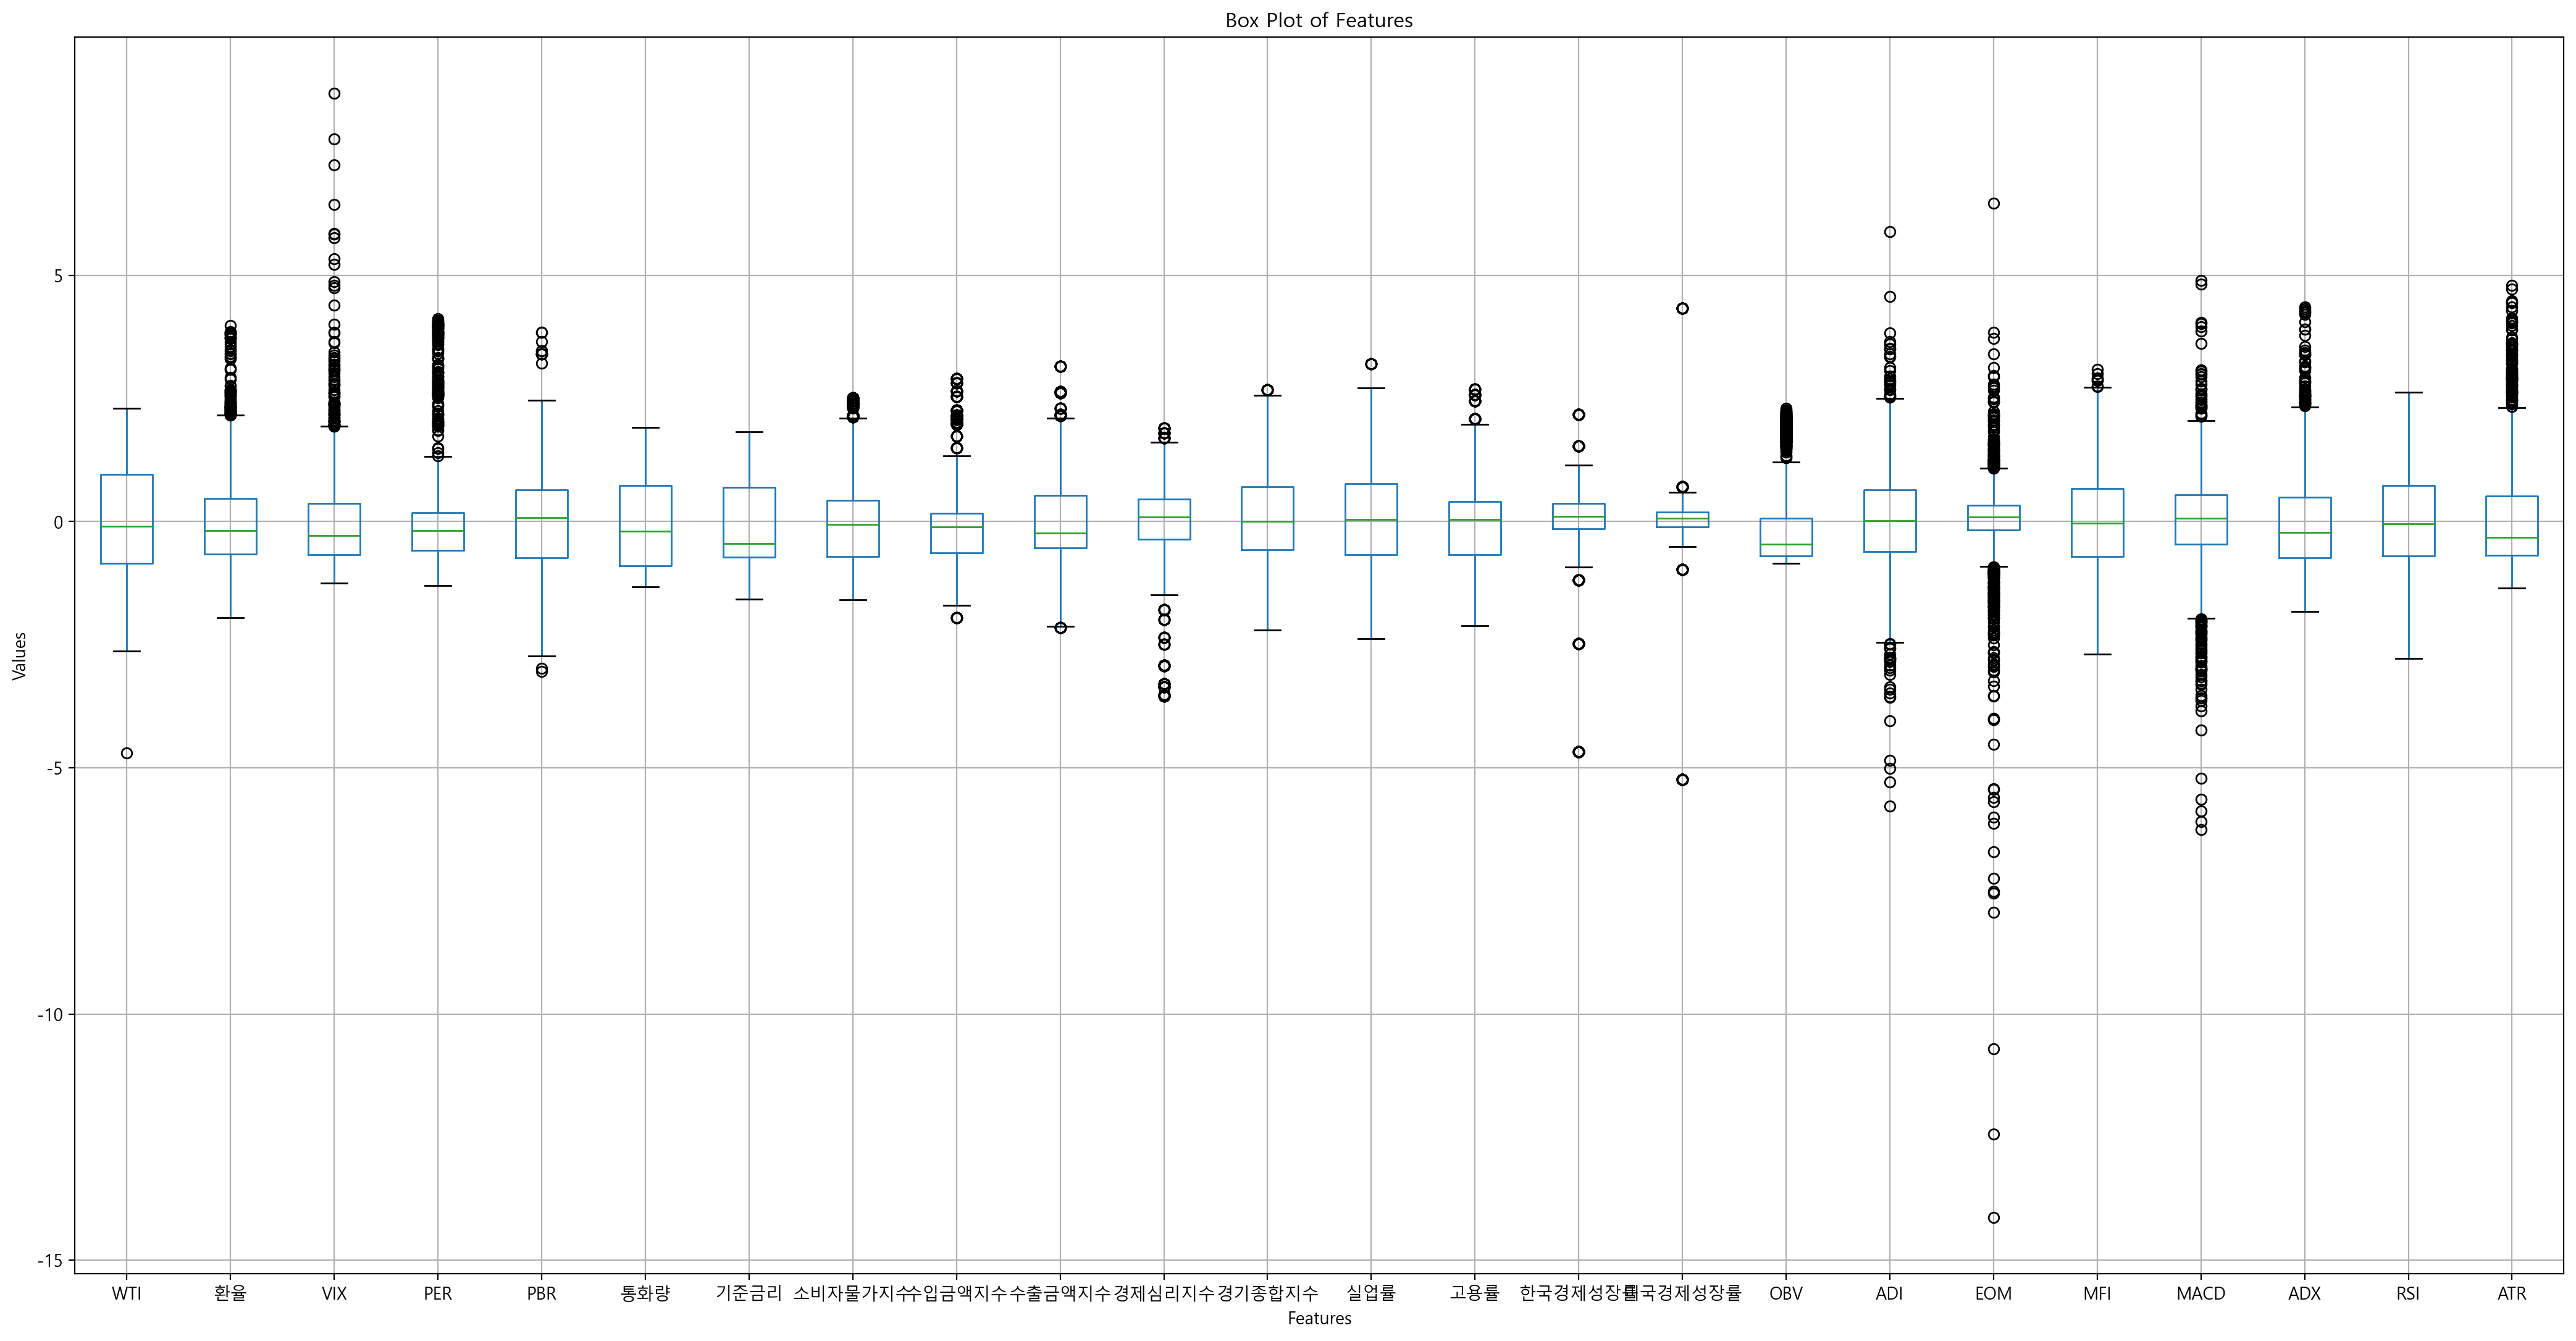

In [36]:
# 스케일링 결과 확인

plt.figure(figsize=(26, 13))
X_train.boxplot()
plt.title('Box Plot of Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

## Q-Q plot

In [37]:
# import statsmodels.api as sm
# from scipy import stats

In [38]:
# # Q-Q plot 생성
# sm.qqplot(X_train, line='s')  # line='s'는 기준 선을 표시합니다.

# # 그래프 제목 및 레이블 설정
# plt.title('Q-Q Plot')
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Sample Quantiles')

# # 그래프 표시
# plt.show()

In [39]:
# feature_names = [X_train.columns]

# # Loop through each feature
# for i, feature_name in enumerate(feature_names):
#     # Create a QQ plot for the current feature
#     sm.qqplot(X_train[feature_name], line='s')
#     plt.title(f'QQ Plot for {feature_name}')
#     plt.show()

In [40]:
# import math
# import matplotlib.pyplot as plt

# df_수치_윈저라이징전 = X_train[X_train.select_dtypes(float).columns]

# # 전체 그래프의 개수
# n_graphs = len(df_수치_윈저라이징전.columns)

# # 한 줄에 10개의 그래프를 그리기 위한 행(row)의 개수 계산
# n_rows = math.ceil(n_graphs / 10)

# # figure와 axes 생성
# fig, axes = plt.subplots(n_rows, 10, figsize=(15, 15))

# # 각 컬럼에 대한 boxplot 그리기
# for i, col in enumerate(df_수치_윈저라이징전):
#     ax = axes[i // 10, i % 10]
#     ax.boxplot(df_수치_윈저라이징전[col].dropna())
#     ax.set_title(col, fontsize=12)

# plt.tight_layout()
# plt.show()

In [41]:
# from scipy import stats

# def qqplot(df,ncols,nrows):
#     plt.rcParams['axes.unicode_minus'] = False
#     plt.rcParams["font.family"] = 'Malgun Gothic'
   
#     fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
#     fig.set_size_inches((50, 80))

#     for ax, i in zip(axs.ravel(), df):
#             ax.set_title(col, fontsize=20)  # 글씨 크기 설정
#             ax.set_ylabel('Value', fontsize=20)  # 글씨 크기 설정
#             stats.probplot(df[i], dist=stats.norm, plot=ax)
#             ax.set_title(str(i))

#     plt.show()

# qqplot(df_수치_윈저라이징전,6,10)

---------------

## 4. 피처 셀렉션

- 먼저 feature_importance로 중요한 피처 순서 확인 -> 일별 데이터의 중요도가 높은 것으로 보아 후보 피처 선정의 한계점이 나타남
- 모델 기반 피처 선정 이후 이 값과 비교하여 타당성 확인

In [42]:
# X_train

In [43]:
# Feature_Importances

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_train, y_train)

rfc.feature_importances_

ftr_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sorted_feature_importance = ftr_importances.sort_values(ascending=True)
data = sorted_feature_importance
importance = pd.DataFrame(data, columns=['feature importances'])
importance

,feature importances
ADI,0.017687
한국경제성장률,0.019096
EOM,0.020035
실업률,0.022927
기준금리,0.024331
MFI,0.028192
고용률,0.028270
미국경제성장률,0.031167
경기종합지수,0.033918
RSI,0.035404


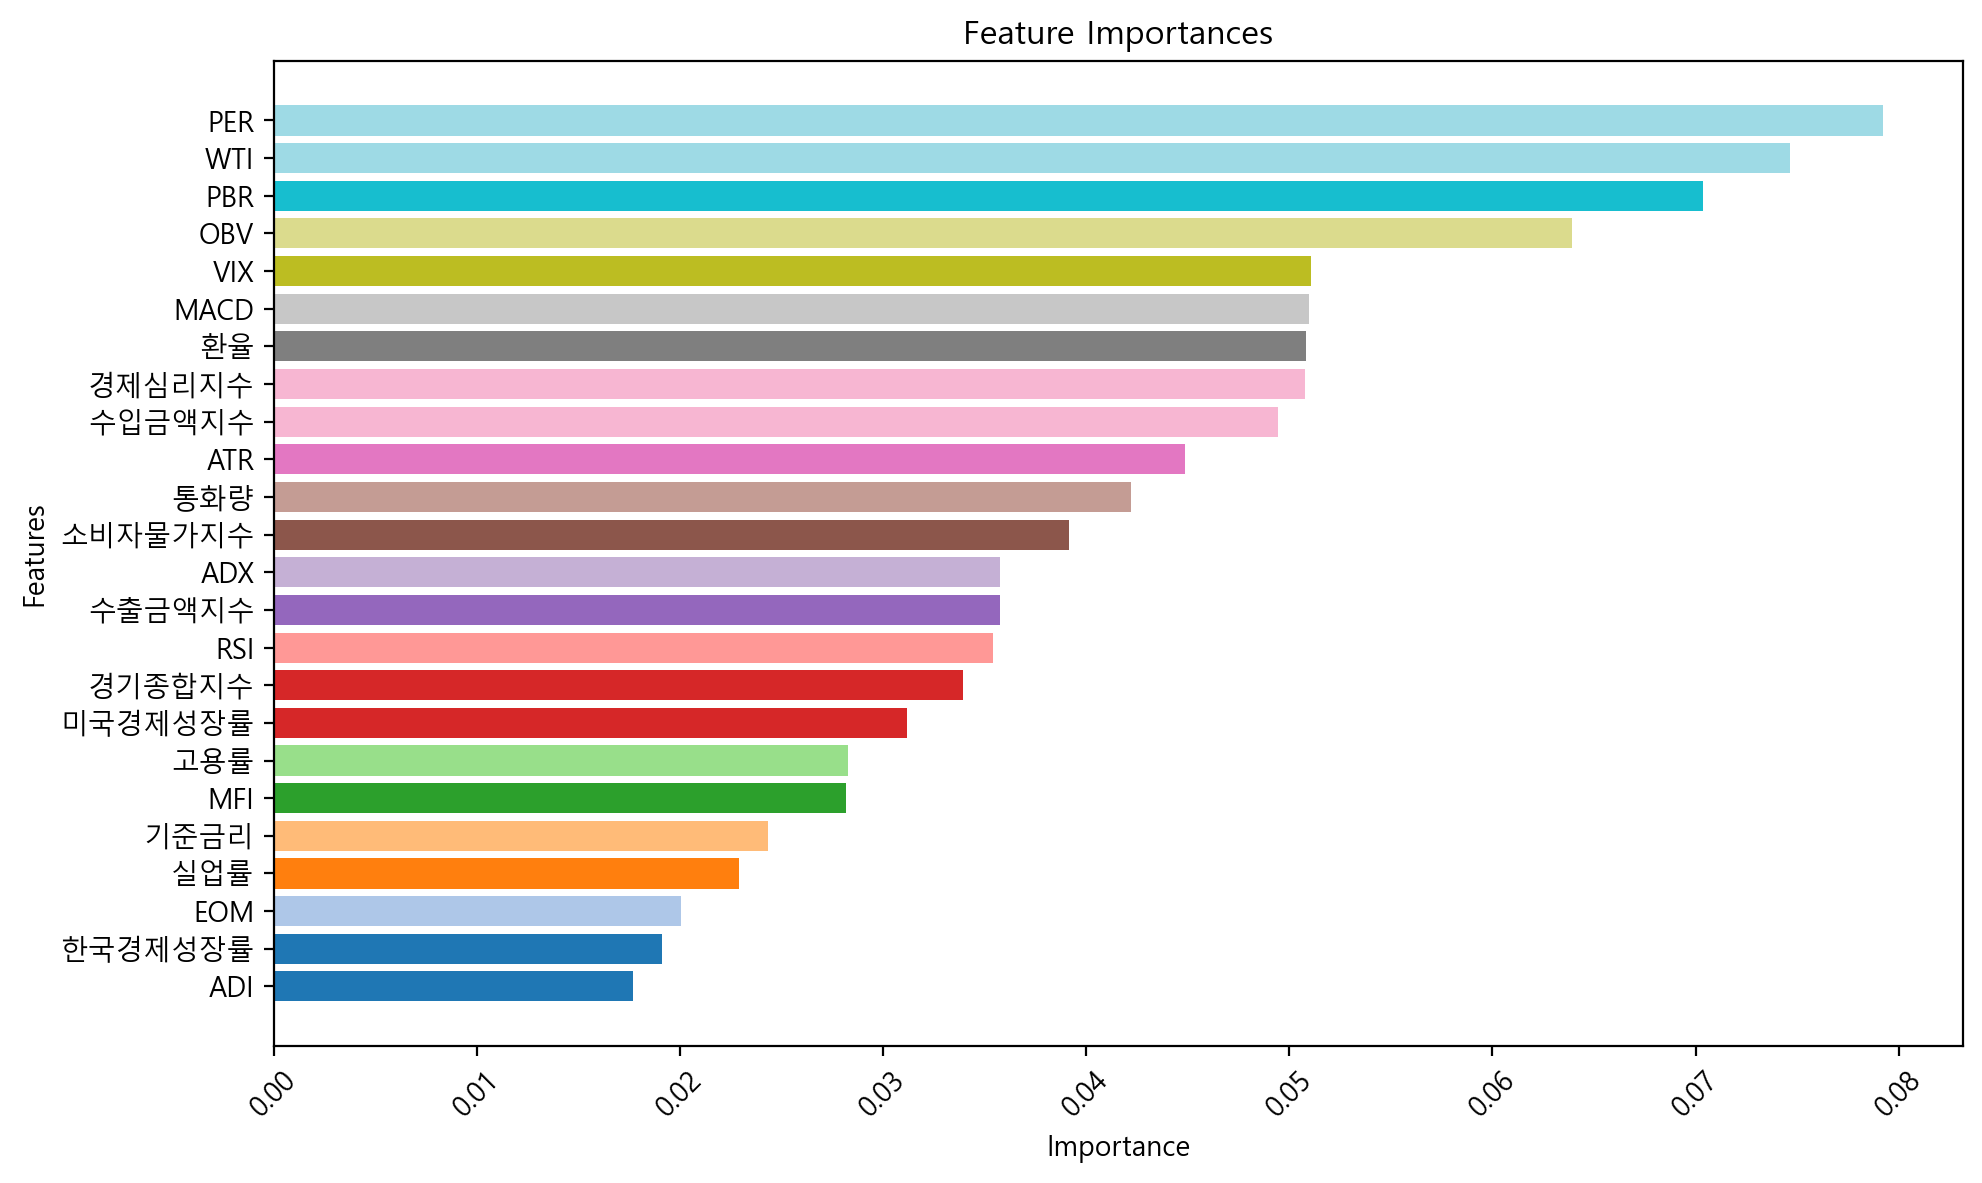

In [44]:
plt.figure(figsize=(10, 6))
colors = plt.cm.tab20(np.linspace(0, 1, len(importance)))

plt.barh(importance.index, importance['feature importances'], color=colors)  # Changed to barh for horizontal bar chart
plt.ylabel('Features')  # Changed to 'Features' for Y-axis label
plt.xlabel('Importance')  # Changed to 'Importance' for X-axis label
plt.title('Feature Importances')

# Rotating x labels for better visibility if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Feature 갯수 구하기 위한 Logit

### 질문 : logit.fit할 때 logit.fit(X, y) or logit.fit(X_train, y_train) 무엇이 맞나요?

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import numpy as np
lr_clf = LogisticRegression()


logit = SelectFromModel(LogisticRegression())
logit.fit(X_train, y_train)
logit_support = logit.get_support()
lr_feature = X_train.loc[:,logit_support].columns.tolist()

In [46]:
print(lr_feature)
print(len(lr_feature))

['PER', 'PBR', '통화량', '소비자물가지수', '수입금액지수', '경제심리지수', '고용률', 'OBV']
8


## 피처 선정

- Filter 방법은 분류 모델 특성 상 통계 기법의 중요도가 떨어지므로 생략

1. 전진선택법 by Wrapper
2. 후진선택법 by Wrapper
3. Stepwise선택법 by Wrapper
4. Lasso by embedded
5. Ridge by embedded
6. ElasticNet by embedded

In [47]:
# 1. 전진선택법 by Wrapper



selected_features = []
best_score = 0

while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_test[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_test)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nForward selected features:")
Forward = selected_features

Selected feature: WTI, Accuracy: 0.5610
Selected feature: VIX, Accuracy: 0.5701
Selected feature: OBV, Accuracy: 0.5770

Forward selected features:


In [48]:
# 2. 후진선택법 by Wrapper



selected_features = X_train.columns.tolist()
best_score = 0

while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_test[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_test)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Backward = selected_features

Removed feature: RSI, Accuracy: 0.6636
Removed feature: MFI, Accuracy: 0.6682

Final selected features:


In [49]:
# 3. Stepwise선택법 by Wrapper



selected_features = []
best_score = 0

# Forward step
while len(selected_features) < X.shape[1]:
    best_feature = None
    best_model = None
    best_score_local = 0

    for feature in X_train.columns:
        if feature not in selected_features:
            features = selected_features + [feature]
            X_train_selected = X_train[features]
            X_val_selected = X_test[features]

            model = LogisticRegression()
            model.fit(X_train_selected, y_train)
            score = model.score(X_val_selected, y_test)

            if score > best_score_local:
                best_score_local = score
                best_feature = feature
                best_model = model

    if best_score_local > best_score:
        selected_features.append(best_feature)
        best_score = best_score_local
        print(f"Selected feature: {best_feature}, Accuracy: {best_score:.4f}")

    else:
        break

# Backward step
while len(selected_features) > 0:
    worst_feature = None
    best_model = None
    best_score_local = 0

    for feature in selected_features:
        features = selected_features.copy()
        features.remove(feature)

        X_train_selected = X_train[features]
        X_val_selected = X_test[features]

        model = LogisticRegression()
        model.fit(X_train_selected, y_train)
        score = model.score(X_val_selected, y_test)

        if score > best_score_local:
            best_score_local = score
            worst_feature = feature
            best_model = model

    if best_score_local > best_score:
        selected_features.remove(worst_feature)
        best_score = best_score_local
        print(f"Removed feature: {worst_feature}, Accuracy: {best_score:.4f}")

    else:
        break

print("\nFinal selected features:")
Stepwise = selected_features

Selected feature: WTI, Accuracy: 0.5610
Selected feature: VIX, Accuracy: 0.5701
Selected feature: OBV, Accuracy: 0.5770

Final selected features:


In [50]:
# 4. Lasso

lasso_model = LogisticRegression()
param_grid = {'penalty' : ['l1'], 
                'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
                'solver' : ['liblinear']}

grid_search = GridSearchCV(lasso_model, param_grid=param_grid, return_train_score=True, cv=5)
grid_search.fit(X_train, y_train)

df = pd.DataFrame(grid_search.cv_results_)
df = df.sort_values(by=['rank_test_score'], ascending=True)
df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

GridSearchCV 최적 파라미터: {'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 최고 정확도:0.6608


In [51]:
lasso_best = LogisticRegression(C=0.0127, penalty='l1', solver='liblinear').fit(X_train, y_train)

df_lasso = pd.DataFrame()
df_lasso['feature'] = X_train.columns
df_lasso['coef'] = lasso_best.coef_[0]
df_lasso.drop(df_lasso[df_lasso['coef']==0].index, inplace=True)
df_lasso

,feature,coef
1,환율,-0.002695
2,VIX,-0.284451
3,PER,-0.168746
4,PBR,0.307835
9,수출금액지수,0.439300
21,ADX,-0.032285


In [52]:
# 라쏘에서 선택된 피처
lasso = df_lasso['feature'].values.tolist()
print('Lasso에서 선택된 피처 수 {0:1.0f}'.format(len(df_lasso)), '개')
lasso

Lasso에서 선택된 피처 수 6 개


['환율', 'VIX', 'PER', 'PBR', '수출금액지수', 'ADX']

In [53]:
# # 5. Ridge

# ridge_model = LogisticRegression()
# param_grid = {'penalty' : ['l2'], 
#                 'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
#                 'solver' : ['liblinear']}

# grid_search = GridSearchCV(ridge_model, param_grid=param_grid, return_train_score=True, cv=5)
# grid_search.fit(X_train, y_train)

# df = pd.DataFrame(grid_search.cv_results_)
# df = df.sort_values(by=['rank_test_score'], ascending=True)
# df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
# print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))


# ridge_model = LogisticRegression(penalty='l2', solver='liblinear')

# # Define the range of alpha values (C values)
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 2, 5, 10]
# }

# # Grid search using cross-validation
# grid_search = GridSearchCV(ridge_model, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Display the results
# df = pd.DataFrame(grid_search.cv_results_)
# df = df.sort_values(by=['rank_test_score'], ascending=True)
# df[['params', 'mean_test_score', 'rank_test_score']]

# # Print the best parameters and best score
# print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
# print('GridSearchCV 최고 정확도: {:.4f}'.format(grid_search.best_score_))


# ridge_model = LogisticRegression()
# param_grid = {'penalty' : ['l2'], 
#                 'C' : [0.001, 0.01, 0.1, 1, 2, 5, 10],
#                 'solver' : ['liblinear']}

# grid_search = GridSearchCV(ridge_model, param_grid=param_grid, return_train_score=True, cv=5)
# grid_search.fit(X_train, y_train)

# df = pd.DataFrame(grid_search.cv_results_)
# df = df.sort_values(by=['rank_test_score'], ascending=True)
# df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
# print('GridSearchCV 최적 파라미터:', grid_search.best_params_)
# print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_search.best_score_))

In [54]:
# ridge_best = LogisticRegression(C = 0.001 ,penalty='l2', solver='liblinear').fit(X_train, y_train)

# df_ridge = pd.DataFrame()
# df_ridge['feature'] = X_train.columns
# df_ridge['coef'] = ridge_best.coef_[0]
# df_ridge.drop(df_ridge[df_ridge['coef']==0].index, inplace=True)
# df_ridge

In [55]:
# # 릿지에서 선택된 피처
# ridge = df_ridge['feature'].values.tolist()
# print('Ridge에서 선택된 피처 수 {0:1.0f}'.format(len(df_ridge)), '개')
# ridge

## 최종 피처 선정

In [56]:
list_Forward = list(Forward)
list_Backward = list(Backward)
list_Stepwise = list(Stepwise)
list_lasso = list(lasso)
list_col_all = X_train.columns

In [57]:
def func_Forward(x):
    if x in list_Forward:
        return 1
    else:
        return 0
    
def func_Backward(x):
    if x in list_Backward:
        return 1
    else:
        return 0


def func_Stepwise(x):
    if x in list_Stepwise:
        return 1
    else:
        return 0
    
def func_lasso(x):
    if x in list_lasso:
        return 1
    else:
        return 0
    

In [58]:
# 2번 선택된 Feature

feature_counts = pd.DataFrame()
feature_counts['Feature'] = list_col_all
feature_counts['Forward'] = list_col_all.map(func_Forward)
feature_counts['Backward'] = list_col_all.map(func_Backward)
feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
feature_counts['lasso'] = list_col_all.map(func_lasso)


feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]
feature_final = feature_counts[feature_counts["total"]>=2]
list_feature_final = list(feature_final["Feature"])
print("선택된 피쳐수 :", len(list_feature_final))
feature_final

선택된 피쳐수 : 8


,Feature,Forward,Backward,Stepwise,lasso,total
0,WTI,1,1,1,0,3
1,환율,0,1,0,1,2
2,VIX,1,1,1,1,4
3,PER,0,1,0,1,2
4,PBR,0,1,0,1,2
9,수출금액지수,0,1,0,1,2
16,OBV,1,1,1,0,3
21,ADX,0,1,0,1,2


In [59]:
# # 3번 선택된 Feature

# feature_counts = pd.DataFrame()
# feature_counts['Feature'] = list_col_all
# feature_counts['Forward'] = list_col_all.map(func_Forward)
# feature_counts['Backward'] = list_col_all.map(func_Backward)
# feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
# feature_counts['lasso'] = list_col_all.map(func_lasso)


# feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]
# feature_final = feature_counts[feature_counts["total"]>=3]
# list_feature_final = list(feature_final["Feature"])
# print("선택된 피쳐수 :", len(list_feature_final))
# feature_final

In [60]:
# # 4번 선택된 Feature

# feature_counts = pd.DataFrame()
# feature_counts['Feature'] = list_col_all
# feature_counts['Forward'] = list_col_all.map(func_Forward)
# feature_counts['Backward'] = list_col_all.map(func_Backward)
# feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
# feature_counts['lasso'] = list_col_all.map(func_lasso)
# feature_counts['ridge'] = list_col_all.map(func_ridge)

# feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
# feature_final = feature_counts[feature_counts["total"]>=4]
# list_feature_final = list(feature_final["Feature"])
# print("선택된 피쳐수 :", len(list_feature_final))
# feature_final

In [61]:
# # 5번 선택된 Feature

# feature_counts = pd.DataFrame()
# feature_counts['Feature'] = list_col_all
# feature_counts['Forward'] = list_col_all.map(func_Forward)
# feature_counts['Backward'] = list_col_all.map(func_Backward)
# feature_counts['Stepwise'] = list_col_all.map(func_Stepwise)
# feature_counts['lasso'] = list_col_all.map(func_lasso)
# feature_counts['ridge'] = list_col_all.map(func_ridge)

# feature_counts["total"] = feature_counts["Forward"]+feature_counts['Backward']+feature_counts["Stepwise"]+feature_counts["lasso"]+feature_counts["ridge"]
# feature_final = feature_counts[feature_counts["total"]>=5]
# list_feature_final = list(feature_final["Feature"])
# print("선택된 피쳐수 :", len(list_feature_final))
# feature_final

In [62]:
final_ftr = feature_final['Feature'].values

----------------------------------------

## 5. 다중공선성 확인 (생략 가능 단계)

- 분류 모델 특성 상 독립변수 간의 상관관계가 중요하지 않지만, <br> 이후 로지스틱회귀, SVM 모델도 사용할 것을 감안하여 다중공선성 확인

In [63]:
# X_train = X_train[lr_feature]
# X_test = X_test[lr_feature]

In [64]:
X_train = X_train[final_ftr]
X_test = X_test[final_ftr]

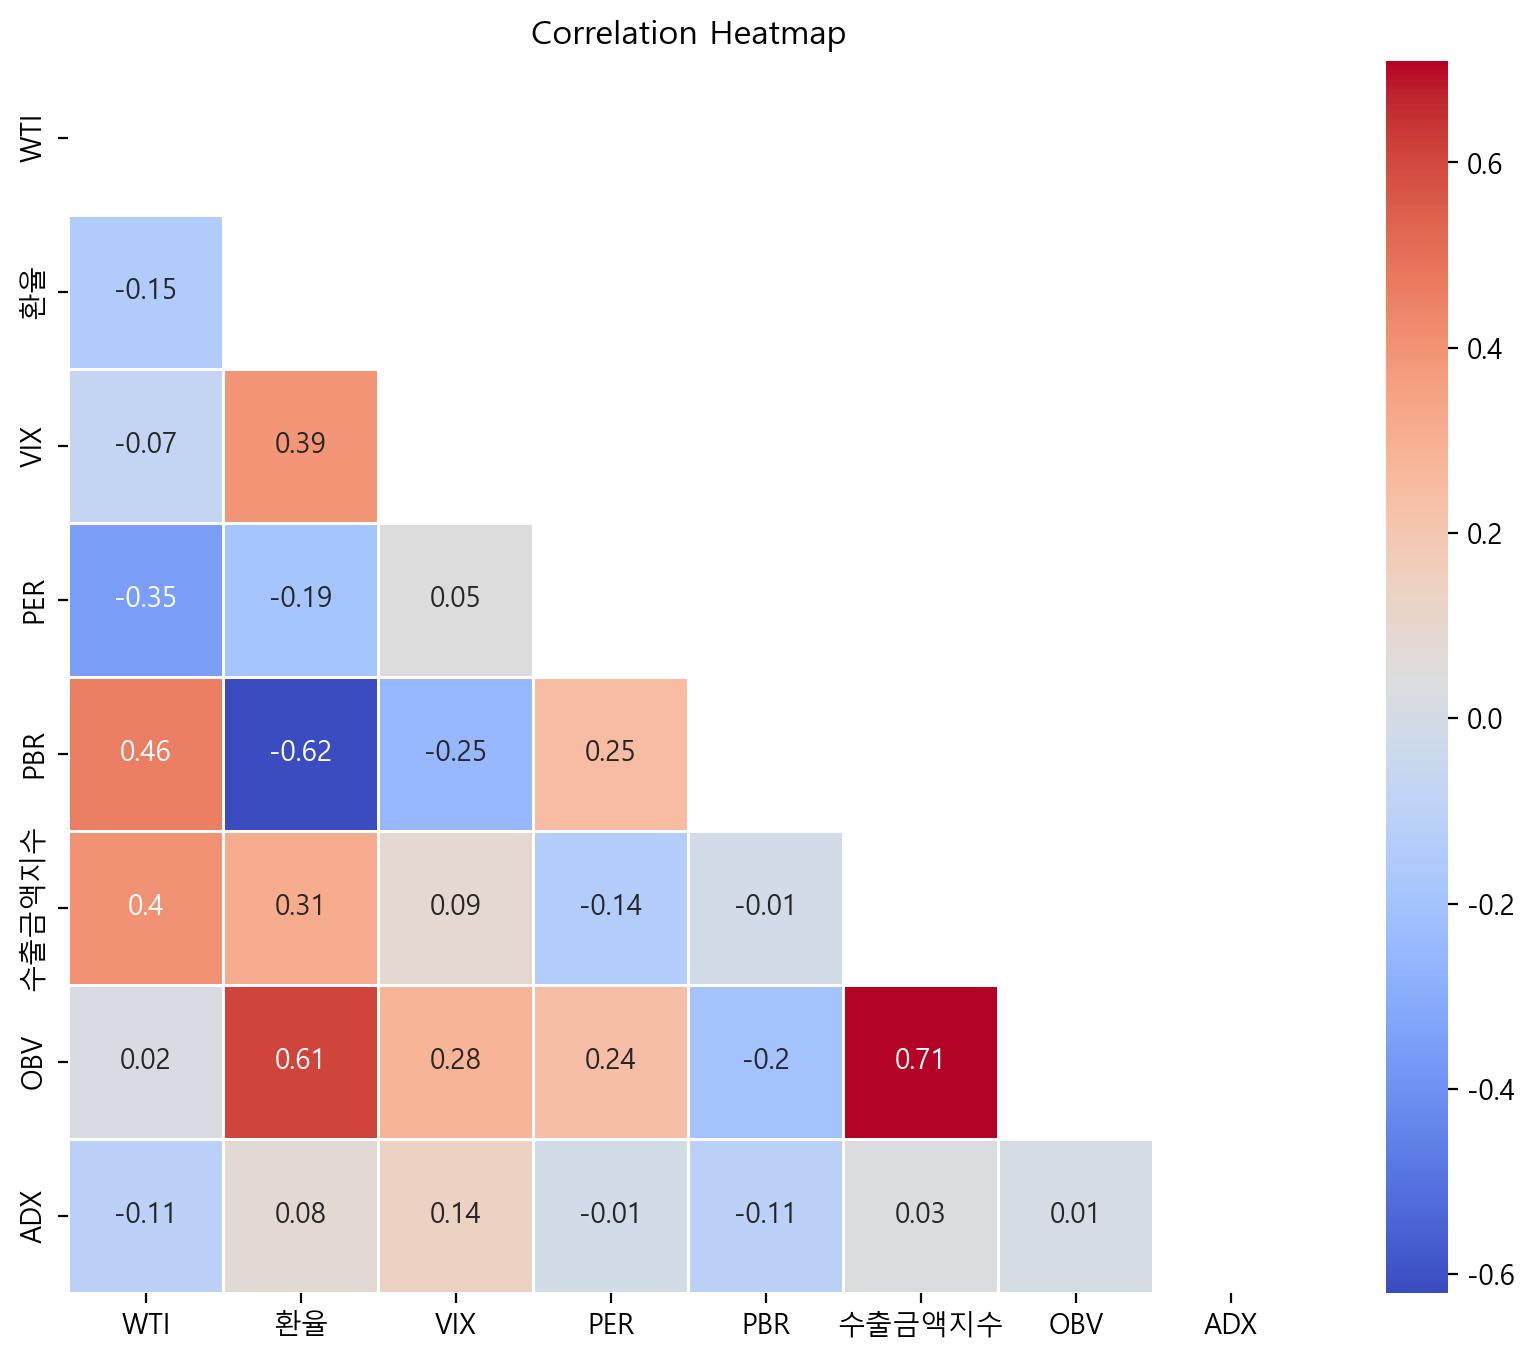

In [65]:
# 상관관계 행렬을 구합니다.
corr = X_train.corr().round(2)

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그립니다.
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# extract effective features using variance inflation factor
vif = pd.DataFrame()

# variance_inflation_factor(X, i) : Xi를 x나머지로 회귀분석한 후 VIF값을 구한것. 즉 xi의 vif값. 즉 이값이 높을수록 종속성이 높다는 뜻

vif['VIF_Factor'] = [variance_inflation_factor(X_train.values, i) 
                     for i in range(X_train.shape[1])]
vif['Feature'] = X_train.columns
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,Feature
6,6.512426,OBV
5,3.965557,수출금액지수
1,3.768134,환율
3,2.662506,PER
4,2.586562,PBR
0,2.309233,WTI
2,1.240475,VIX
7,1.053882,ADX


-----------------------

## 6. 모델링

In [67]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    for clf in models:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred), 2),
                    round(precision_score(y_test, pred, average='weighted'), 2),
                    round(recall_score(y_test, pred, average='weighted'), 2),
                    round(f1_score(y_test, pred, average='weighted'), 2))
        rdict['model'].append(clf.__class__.__name__)
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

    rdf = pd.DataFrame(data=rdict)
    return rdf

In [68]:
model_basic(X_train, y_train, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 2046, number of used features: 8
[LightGBM] [Info] Start training from score -0.767180
[LightGBM] [Info] Start training from score -1.403052
[LightGBM] [Info] Start training from score -1.238448


,model,accuracy,precision,recall,f1_score
0,LogisticRegression,0.56,0.49,0.56,0.49
1,DecisionTreeClassifier,0.84,0.84,0.84,0.84
2,SVC,0.76,0.75,0.76,0.75
3,RandomForestClassifier,0.89,0.89,0.89,0.89
4,XGBClassifier,0.89,0.89,0.89,0.89
5,LGBMClassifier,0.89,0.89,0.89,0.89


--------------

## 7. 교차 검증 & 하이퍼 파라미터 조정

In [69]:
X_test

,WTI,환율,VIX,PER,PBR,수출금액지수,OBV,ADX
날짜,,,,,,,,
2012-11-09,0.664747,-0.764474,0.028708,-0.465110,0.707815,0.066148,-0.760320,0.413667
2012-06-07,0.610553,0.381148,0.449106,-0.572532,0.582572,-0.342603,-0.744289,1.730018
2022-08-09,0.856811,2.075725,0.455865,-0.902120,-0.920349,1.883473,1.778011,-0.072835
2018-04-17,-0.182850,-1.017589,-0.425484,-0.369896,0.206841,0.536653,-0.249262,-1.447380
2015-11-27,-1.258495,0.024792,-0.443057,0.367405,0.206841,-1.182160,-0.612799,-0.704823
...,...,...,...,...,...,...,...,...
2023-05-04,-0.094405,2.563625,0.228769,-0.560325,-1.233458,1.052738,1.894162,-0.307939
2014-04-02,1.252212,-1.178246,-0.717465,-0.184350,0.645193,0.411675,-0.649090,-0.696676
2017-05-26,-0.907751,-0.343155,-1.160843,0.225804,0.081598,-0.531540,-0.366261,4.065928


------------------------

## 8. 투자 전략 구현 및 백테스팅

----------------